## Automation Lesson

##### Author: Alex Sherman | alsherman@deloitte.com

### Lesson Objectives:
- Discuss python String formatting
- Discuss Client-side versus Server-side programming
- Learn how to request data (html, css, javascript) from a web page
- Structure the html with BeautifulSoup
- Identify, extract, and store selected elements from the HTML
- Discuss web browser automation with Selenium
- Preview Scrapy

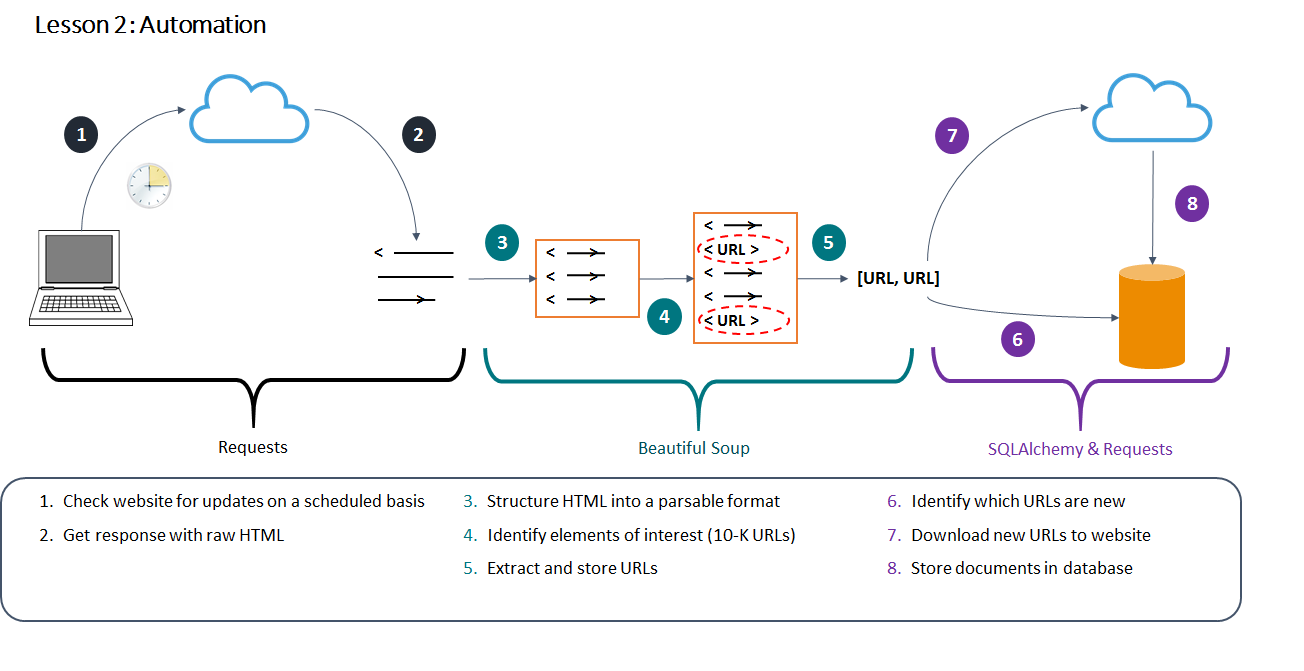

In [1]:
from IPython.display import Image
Image("../../raw_data/images/lesson2_automation.png", width=800, height=700)

In [2]:
# import package to view websites inside the Jupyter Notebook
from IPython.core.display import display, HTML

### Configuration Recap

In [1]:
# use magic command to print working directory
# confirm you are in lesson2_automation directory
%pwd

'C:\\Users\\alsherman\\Desktop\\PycharmProjects\\firm_initiatives\\ml_guild\\lessons\\lesson_2_automation'

In [2]:
%less ../../config.ini

In [5]:
from configparser import ConfigParser, ExtendedInterpolation
config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')

SELENIUM_CHROMEDRIVER_PATH = config['AUTOMATION']['SELENIUM_CHROMEDRIVER_PATH']

### Python String Formatting

We will use formatting to add placeholders into strings in many of the lessons. For this, we will use str.format()

In [6]:
string_formatting_url = 'https://pyformat.info/'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(string_formatting_url)
HTML(iframe)

In [7]:
'This is a python string'

'This is a python string'

In [8]:
'We can add a parameter {}'.format('into the string')

'We can add a parameter into the string'

In [9]:
'format {} the braces'.format('fills in')

'format fills in the braces'

In [10]:
'.format() allows multiple parameters, of any datatype, param: {2}, param: {2},  param: {2}'.format('one', 2, 3.0)

'.format() allows multiple parameters, of any datatype, param: 3.0, param: 3.0,  param: 3.0'

In [11]:
'add {:10} with a {:10} then number'.format('spaces','colon')

'add spaces     with a colon      then number'

In [12]:
# formatting is useful for populating strings as part of a loop
urls = ['url1','url2','url3']

for url in urls:
    print('Successfully requested data from {}'.format(url))

Successfully requested data from url1
Successfully requested data from url2
Successfully requested data from url3


### REQUESTS

Requests is a Python HTTP library, released under the Apache2 License. The goal of the project is to make HTTP requests simpler and more human-friendly. We will use requests to get html, css, and javascript from webpages to collect data from the web.

In [13]:
requests_url = 'http://docs.python-requests.org/en/master/'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(requests_url)
HTML(iframe)

In [4]:
import requests

# set a url for opm.gov
opm_url = r'https://www.opm.gov/'

# r is the common name for a requests instance
r = requests.get(opm_url)

#### Two commonly used methods for a request-response between a client and server are: GET and POST.
- GET - Requests data from a specified resource
- POST - Submits data to be processed to a specified resource


#### Client-side vs Server-side Programming Languages

Web development is all about communication and data exchange. This communication takes place via two parties over the HTTP protocol.

- Server: The Server is responsible for serving the web pages depending on the client/end user requirement. It can be either static or dynamic.
- Client: A client is a party that requests pages from the server and displays them to the end user. In general a client program is a web browser.

source: http://www.c-sharpcorner.com/UploadFile/2072a9/client-side-vs-server-side-programming-languages/

In [15]:
client_server_url = 'https://www.afterhoursprogramming.com/tutorial/javascript/javascript-overview/'
iframe = '<iframe src={} width=700 height=400></iframe>'.format(client_server_url)
HTML(iframe)

In [16]:
# view the response object from requests which contains a server's response to an HTTP request
r

<Response [200]>

In [17]:
# what methods and attributes exist for the requests object
print(dir(r))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [18]:
r.status_code

200

In [19]:
if r.status_code == 200:
    print('success')

success


#### Status Code Explanation    
When a browser requests a service from a web server, an error might occur. The first digit of the status code specifies one of five standard classes of responses.

- 1xx: Information
- 2xx: Successful
- 3xx: Redirection
- 4xx: Client Error
- 5xx: Server Error

https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

In [20]:
r.text[0:1000]

'\r\n<!DOCTYPE html>\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml">\r\n  <head><link rel="shortcut icon" href="/favicon.ico"><title>\r\n\tOPM.gov\r\n</title><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta name="description" content="Welcome to opm.gov"><meta name="keywords" content="OPM,Office of Personnel Management,opm.gov"><meta name="Expires"><meta name="TemplateVersion" content="3.0">\r\n      <meta property="fb:admins" content="568256384">\r\n      <meta property="fb:app_id" content="121223957945585">\r\n      <meta property="og:type" content="government">\r\n      <meta property="og:site_name" content="U.S. Office of Personnel Management">\r\n      <meta property="og:title" content="U.S. Office of Personnel Management - www.OPM.gov">\r\n      <meta property="og:description" content="OPM works in several bro

In [21]:
r.encoding

'ISO-8859-1'

#### Requests text and encoding

Requests will automatically decode content from the server. Most unicode charsets are seamlessly decoded. When you make a request, Requests makes educated guesses about the encoding of the response based on the HTTP headers. 

The text encoding guessed by Requests is used when you access r.text. You can find out what encoding Requests is using, and change it, using the r.encoding property:

- What is the difference between unicode and ascii: https://stackoverflow.com/questions/19212306/whats-the-difference-between-ascii-and-unicode

### Beautiful Soup

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

In [22]:
bs_url = 'https://www.crummy.com/software/BeautifulSoup/bs4/doc/'
iframe = '<iframe src=' + bs_url + ' width=1100 height=300></iframe>'
HTML(iframe)

In [6]:
from bs4 import BeautifulSoup

# structure the text of the request object
b = BeautifulSoup(r.text, 'lxml')

In [24]:
# BeautifulSoup structures the text, removing unnecessary 
# newline \n and tab \t characters
b

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head><link href="/favicon.ico" rel="shortcut icon"/><title>
	OPM.gov
</title><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Welcome to opm.gov" name="description"/><meta content="OPM,Office of Personnel Management,opm.gov" name="keywords"/><meta name="Expires"/><meta content="3.0" name="TemplateVersion"/>
<meta content="568256384" property="fb:admins"/>
<meta content="121223957945585" property="fb:app_id"/>
<meta content="government" property="og:type"/>
<meta content="U.S. Office of Personnel Management" property="og:site_name"/>
<meta content="U.S. Office of Personnel Management - www.OPM.gov" property="og:title"/>
<meta content="OPM works in several broad categories to recruit, retain and honor a world-class workforce for the American people."

### Example HTML

Before we explore the full HMTL, let's work with some example HTML

In [25]:
example_html = """
    <!DOCTYPE html>
    <html lang='en'>

    <head>
        <title>The ML Guild</title>
    </head>

    <body>
        <h1 id='headline'>Machine Learning Guild Overview</h1>
            <p class='description'>The ML guild provides rich learning 
            content around machine learning, including self-guided courses, 
            curriculum-based learning programs, and mentorship by more 
            advanced practitioners</p>
        <h2>Courses</h2>

        <p>Below are the ML Guild Tracks:</p>

        <ul>
            <li class='first'>Explorer</li>
            <li class='second'>Apprentice</li>
            <li class='third'>Master</li>
        </ul>
    </body>

    </html>
"""

### Common BeautifulSoup Syntax

#### Methods
- find: find only the first specified html tag that meets a specified condition
- find_all: find all html tags that meets a specified condition

#### Parameters
- attrs: dict of attributes (e.g. id, class) to filter relevant html

#### Attributes
- text: only view the text in the html (ignore the html itself) 


In [26]:
# Beautiful Soup supports the HTML parser included in Python’s standard library, 
# but it also supports a number of third-party Python parsers. 
# One is the lxml parser, which is fast and lenient (i.e. it will not crash it the html is not formatted correctly)

b = BeautifulSoup(example_html, 'lxml')
b

<!DOCTYPE html>
<html lang="en">
<head>
<title>The ML Guild</title>
</head>
<body>
<h1 id="headline">Machine Learning Guild Overview</h1>
<p class="description">The ML guild provides rich learning 
            content around machine learning, including self-guided courses, 
            curriculum-based learning programs, and mentorship by more 
            advanced practitioners</p>
<h2>Courses</h2>
<p>Below are the ML Guild Tracks:</p>
<ul>
<li class="first">Explorer</li>
<li class="second">Apprentice</li>
<li class="third">Master</li>
</ul>
</body>
</html>

#### find

In [27]:
# find the title


In [28]:
# find the h2


#### text

In [29]:
# get the text of the title


In [30]:
# get the text of the h2


In [31]:
# get the text of a list item


#### find_all

In [32]:
# find all the li elements


In [33]:
# get the first li element from a find_all li


In [34]:
# iteratively print each each from the list


#### attrs

In [35]:
# get the li with a class of 'first'


In [36]:
# get the li with a class of 'second'


In [37]:
# get the term 'headline' from the h1 tag


### Exercise

In [38]:
# Get the text (only) for list element with class='third'


In [39]:
# print the text (only) of all the paragraphs in a list


In [40]:
# print the paragraph with the class description


### Robots.txt

"WWW Robots (also called wanderers or spiders) are programs that traverse many pages in the World Wide Web by recursively retrieving linked pages. For more information see the robots page.
In 1993 and 1994 there have been occasions where robots have visited WWW servers where they weren't welcome for various reasons. Sometimes these reasons were robot specific, e.g. certain robots swamped servers with rapid-fire requests, or retrieved the same files repeatedly. In other situations robots traversed parts of WWW servers that weren't suitable, e.g. very deep virtual trees, duplicated information, temporary information, or cgi-scripts with side-effects (such as voting)."

SOURCE: http://www.robotstxt.org/orig.html

In [41]:
robots_url = 'http://www.robotstxt.org/orig.html'
iframe = '<iframe src={} width=1100 height=400></iframe>'.format(robots_url)
HTML(iframe)

In [42]:
from urllib import robotparser
 
rp = robotparser.RobotFileParser()  # instantiate robotparser
rp.set_url("https://www.facebook.com/robots.txt")  # set the path to the robots.txt file
rp.read()  # read the robots.txt file
rp.can_fetch('*', "https://www.facebook.com")  # check if you are allowed to fetch a specific page

False

In [43]:
rp = robotparser.RobotFileParser()
rp.set_url("https://www2.deloitte.com/robots.txt")
rp.read()
rp.can_fetch('*', "https://www2.deloitte.com/us/en.html")

False

In [44]:
rp = robotparser.RobotFileParser()
rp.set_url("http://www.annualreports.com/robots.txt")
rp.read()
rp.can_fetch("*", "http://www.annualreports.com/Company/southwest-airlines-co")

True

In [45]:
rp = robotparser.RobotFileParser()
rp.set_url('https://www.opm.gov/robots.txt')
rp.read()
rp.can_fetch("*", "https://www.opm.gov")

True

### Exercise: Extract blog posts from OPM.gov

In [46]:
### REVIEW: GET OPM HTML

# set a url for the OPM website homepage
url = r'https://www.opm.gov/'

# r is the common name for a requests instance
r = requests.get(url)

In [47]:
# read in the html from deloitte
b = BeautifulSoup(r.text, 'lxml')

In [48]:
# find the first blog post


In [49]:
# get the blog Title


In [50]:
# get the date the blog was posted


In [51]:
# get the blog text


In [52]:
# store all the blog posts


### Store Data

We will use a common python data stucture (e.g. list or dict) to store the data for later use. 

Below is a common data collection pattern:
- A. set an empty data structure to store data
- B. iterate through an existing data set container
- C. extract selected pieces of information, disregard the rest of the data
- D. add the selected information to the created data structure
- E. view results

In [53]:
all_headlines = []  # A 

for blog in blogs: # B
    headline = blog.find('div', attrs={'class':'Blog_Title'}).text   # C
    all_headlines.append(headline)  # D

all_headlines  # E

NameError: name 'blogs' is not defined

In [ ]:
# list comprehension - a pythonic idiom to accomplish the same task in one line
# resource: http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html#list-comprehensions

[blog.find('div', attrs={'class':'Blog_Title'}).text for blog in blogs]

### Collect ZIP URLS from OPM.gov

In [54]:
url = r'https://www.opm.gov/data/Index.aspx?tag=FedScope'
r = requests.get(url)
b = BeautifulSoup(r.text, 'lxml')

In [55]:
# find the html for the table of files (HINT: look for the class DataTable)
data_table = b.find('table', attrs={'class':'DataTable'})

In [56]:
# find the html for the first row of files (HINT: make sure to skip the table headers)
row = data_table.find_all('tr')[1]
row

<tr>
<td valign="top">FedScope Accessions Cube (FY 2011 - FY 2017)</td>
<td valign="top">
<a href="/Data/Files/533/b639c412-f4fe-42fb-984f-4d10ee7154f1.pdf"><img alt="Data Dictionary" border="0" src="/img/global/icoPDF.gif"/></a>
<span class="FileSize">[297.96 KB]</span>
</td>
<td>
<span>
<a href="/Data/Files/533/300c70ba-9803-4ec5-ad96-0eea3fd1af61.zip"><img alt="Download File" border="0" src="/img/global/icoZip.gif"/></a>
<span class="FileSize">[12.88 MB]</span>
</span>
</td>
<td valign="top">
						Website: <a href="https://www.fedscope.opm.gov/">www.fedscope.opm.gov</a><br/>
						Email: <a href="mailto:FedScope@opm.gov">FedScope@opm.gov</a><br/>
</td>
<td>
						fedscope
					</td>
<td>3/2/2018</td>
</tr>

In [57]:
# find the 'td' element with the file name
filename = row.find('td').text
filename

'FedScope Accessions Cube (FY 2011 - FY 2017)'

In [58]:
# find the 'td' element with the .zip link (HINT: look for 'a href')
url = data_table.find_all('td')[2]
url

<td>
<span>
<a href="/Data/Files/533/300c70ba-9803-4ec5-ad96-0eea3fd1af61.zip"><img alt="Download File" border="0" src="/img/global/icoZip.gif"/></a>
<span class="FileSize">[12.88 MB]</span>
</span>
</td>

In [59]:
# get the zip url
url_end = url.find('a')['href']
url_end

'/Data/Files/533/300c70ba-9803-4ec5-ad96-0eea3fd1af61.zip'

In [60]:
# add the base url
BASE_URL = r'https://www.opm.gov'
url = ''.join([BASE_URL, url_end])
url

'https://www.opm.gov/Data/Files/533/300c70ba-9803-4ec5-ad96-0eea3fd1af61.zip'

In [61]:
# Exception Handling
0/0

ZeroDivisionError: division by zero

In [62]:
### Try - Except to handle expected errors
try:
   0/0
except ZeroDivisionError:
    print('successfully caught error')

successfully caught error


#### Exercise

Combine the above code to collect all the zip urls into differnet a list (exercise 1) then into a dict (exercise 2)

In [ ]:
# Identify, extract, and store all zip urls
# store them in a list called zip_urls

BASE_URL = r'https://www.opm.gov'
zip_urls = []
data_table = b.find('table', attrs={'class':'DataTable'})


for row in data_table.find_all('tr')[1:]:
    # TODO
    

In [ ]:
# Identify, extract, and store all filenames and zip urls
# store them in a dict called zip_urls

BASE_URL = r'https://www.opm.gov'
zip_urls = {}
data_table = b.find('table', attrs={'class':'DataTable'})

for row in data_table.find_all('tr')[1:]: # skip table headers
    # TODO
    

# Bonus Material

### Selenium - Web Browser Automation

### Installation

Download ChromeDriver:
- https://chromedriver.storage.googleapis.com/index.html?path=2.37/

In Git Bash Type the following:
- conda install -c conda-forge selenium
- conda install -c conda-forge googlemaps

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [ ]:
# confirm path to selenium executable
SELENIUM_CHROMEDRIVER_PATH

In [ ]:
rp = robotparser.RobotFileParser()
rp.set_url('https://www.opm.gov/data/Index.aspx?tag=FedScope')
rp.read()
rp.can_fetch("*", "https://www.opm.gov")

In [ ]:
# specify which browser to use (Chrome)
# https://chromedriver.storage.googleapis.com/index.html?path=2.25/
browser = webdriver.Chrome(SELENIUM_CHROMEDRIVER_PATH)
browser.implicitly_wait(2)

In [ ]:
# go to OPM.gov
browser.get(r'https://www.opm.gov/data/Index.aspx?tag=FedScope')

In [ ]:
# select an item in the sort by box
browser.find_element_by_xpath(
    r'//*[@id="ctl01_ctl00_MainContentPlaceHolder_MainContentPlaceHolder_SortCol"]/option[2]').click()


In [ ]:
### Press 'go' button
browser.find_element_by_xpath(
    r'//*[@id="ctl01_ctl00_MainContentPlaceHolder_MainContentPlaceHolder_Filter"]').click()

In [ ]:
# type and submit a query in the search box
inputbox = browser.find_element_by_xpath(r'//*[@id="ctl01_ctl00_MainContentPlaceHolder_MainContentPlaceHolder_SearchTerm"]')
      
inputbox.send_keys('OPM')
inputbox.send_keys(Keys.ENTER)

In [ ]:
# return to OPM.gov
browser.get(r'https://www.opm.gov/data/Index.aspx?tag=FedScope')

In [ ]:
# select the assessment drop down
browser.find_element_by_xpath(
        r'//*[@id="SecondaryNavigation"]/li[1]/a[2]'
        ).click()

In [ ]:
# get_first_zip_link
html = browser.find_element_by_xpath(
    r'//*[@id="ctl01_ctl00_MainContentDiv"]/table/tbody/tr[2]/td[3]/span/a')
link = html.get_attribute('href')
link

In [ ]:
# close the browser
browser.close()

### APIs

In [ ]:
# XML
xml_url = r'https://raw.githubusercontent.com/Alexjmsherman/python_for_data_analysis/master/Data_Scraping_APIs_and_Automation/data/example_xml.xml'
r = requests.get(xml_url)
b = BeautifulSoup(r.text, 'xml')

b

In [ ]:
# find the fourth topic
b.find_all('NAME')[3]

In [ ]:
# collect data from google maps api
# documentation: https://developers.google.com/maps/documentation/geocoding/start
address = 'Cosi Rosslyn'
api_url = r'https://maps.googleapis.com/maps/api/geocode/xml?address={}'.format(address)
r = requests.get(api_url)
b = BeautifulSoup(r.text, 'xml')

b

In [ ]:
# find the status code
b.find('status').text

In [ ]:
# find the postal code
address_components = b.find_all('address_component')
for address in address_components:
    address_type = address.find('type').text
    if 'postal_code' in address_type:
        print(address.find('long_name').text)

In [ ]:
# find the latitude and longitude
latitude = b.find('location').find('lat').text
longitude = b.find('location').find('lng').text

In [ ]:
# json
import json

# The missing JSON inspector for chrome 
# https://chrome.google.com/webstore/detail/the-missing-json-inspecto/hhffklcokfpbcajebmnpijpkaeadlgfn
address = 'Cosi Rosslyn'
api_json_url = r'https://maps.googleapis.com/maps/api/geocode/json?address={}'.format(address)
r = requests.get(api_json_url)

In [ ]:
# get the latitude and longitude from json
j = json.loads(r.text)
j

In [ ]:
# latitude
print(j['results'][0]['geometry']['location']['lat'])

# longitude
print(j['results'][0]['geometry']['location']['lng'])

In [ ]:
# use a python api wrapper package for google maps
# https://github.com/googlemaps/google-maps-services-python
import googlemaps  

gmaps = googlemaps.Client(key='INSERT YOUR API KEY HERE')
gmaps.reverse_geocode((latitude,longitude))
gmaps.places('Cosi', location=(latitude, longitude), radius=1000)

### Scrapy

"Scrapy is an application framework for crawling web sites and extracting structured data which can be used for a wide range of useful applications, like data mining, information processing or historical archival."

##### How does Scrapy compare to BeautifulSoup or lxml?

"BeautifulSoup and lxml are libraries for parsing HTML and XML. Scrapy is an application framework for writing web spiders that crawl web sites and extract data from them.

Scrapy provides a built-in mechanism for extracting data (called selectors) but you can easily use BeautifulSoup (or lxml) instead, if you feel more comfortable working with them. After all, they’re just parsing libraries which can be imported and used from any Python code.

In other words, comparing BeautifulSoup (or lxml) to Scrapy is like comparing jinja2 to Django."

In [ ]:
scrapy_url = 'https://doc.scrapy.org/en/latest/'
iframe = '<iframe src=' + scrapy_url + ' width=1100 height=300></iframe>'
HTML(iframe)

In [ ]:
import scrapy

class AnnualReportsSpider(scrapy.Spider):
    name = "annual_reports"
    # create a list of all the pages with alphabetical company names
    start_urls = ['http://www.annualreports.com/Companies?a={}'.format(letter) for letter in ['A','B']]

    def parse(self, response):
        # get the url of the company specific webpage
        for company in response.css('#wrapper > section > table > tbody > tr > td > a::attr(href)').extract():
            if company is not None:
                # go to each company page to extract the names of all the annual reports
                yield response.follow(company, self.parse_reports)

    def parse_reports(self, response):
        # extract the company name 
        company_name = str(response.css('#wrapper > div.company-header.portal-header > h1::text')[0].extract())
        # collect all available annual reports
        reports = [report for report in response.css('#wrapper > div.venders-block > article > div.content-holder.content-archive > ul > li > div.text-holder > ul > li:nth-child(1)::text').extract()]
        yield {company_name:str(reports)}

Run the following from Git Bash:
- **scrapy runspider annual_reports_spider.py -o annual_reports.json**